## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.matlib
import mat73

from scipy import io
from matplotlib.animation import FuncAnimation, FFMpegWriter

%matplotlib inline
#change to notebook to view movies here

In [2]:
def plot_allen(ax):
    allen_ccf = mat73.loadmat(data_dir + '/allen_ccf_overlay.mat')['allen_ccf']
    for i in range(len(allen_ccf)):
        temp1 = allen_ccf[i]
        ax.plot(temp1[:,0],temp1[:,1],'w',lw=.5)

In [3]:
data_dir = '/home/ryanr/widefield'
outdir = '/home/ryanr/Allen/arousal_final/model_predictions'
figdir = '/home/ryanr/Allen/arousal_final/figs'
mask = io.loadmat(data_dir+'/newmask.mat')
mask = mask["newmask"]
mask.dtype = bool
mask_long = mask.reshape(16384,order='F')
allen_ccf = mat73.loadmat(data_dir + '/allen_ccf_overlay.mat')['allen_ccf']

In [4]:
subjects = [4,5,6,7,8,9,10]
modality = 'jrgeco'

# Videos

In [5]:
subj = subjects[-1]

## Model comparisons

In [6]:
data1 = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
data2 = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
data3 = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')

outmat1 = np.zeros((data1.shape[0],16384), dtype=np.single)
outmat2 = outmat1.copy()
outmat3 = outmat1.copy()

outmat1[:,mask_long] = data1
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(data1.shape[0],128,128,order='F')

outmat2[:,mask_long] = data2
outmat2 = np.ma.masked_where(outmat2==0, outmat2)
outmat2 = outmat2.reshape(data2.shape[0],128,128,order='F')

outmat3[:,mask_long] = data3
outmat3 = np.ma.masked_where(outmat3==0, outmat3)
outmat3 = outmat3.reshape(data3.shape[0],128,128,order='F')

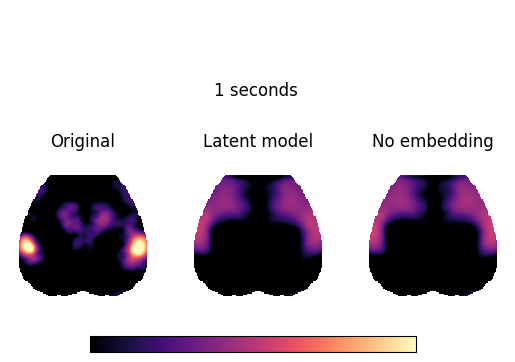

In [7]:
# MOVIE
start = 2800
c1 = .01

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
im1 = ax1.imshow(outmat1[0,:,:], animated=True, vmin=-c1, vmax=c1, cmap = 'magma')
im2 = ax2.imshow(outmat2[0,:,:], animated=True, vmin=-c1, vmax=c1, cmap = 'magma')
im3 = ax3.imshow(outmat3[0,:,:], animated=True, vmin=-c1, vmax=c1, cmap = 'magma')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

cbar_ax = fig.add_axes([.25,.15,.51,.8])
cbar_ax.axis('off')
cbar = fig.colorbar(im1,ax=cbar_ax,orientation = "horizontal")
cbar.set_ticks([])

i = start
def update(*args):
    global i
    if (i<outmat1.shape[0]):
        i += 1
    else:
        i=0
    im1.set_array(outmat1[i,:,:])
    im2.set_array(outmat2[i,:,:])
    im3.set_array(outmat3[i,:,:])
    ax1.title.set_text('Original')
    ax2.title.set_text('Latent model')
    ax3.title.set_text('No embedding')
    fig.suptitle(str(np.ceil((i-start)*.05).astype(int)) + ' seconds', x=.51, y=0.8)

    return im1, im2, im3

ani = FuncAnimation(fig, update, blit=True, interval=5, frames=3000)

plt.show()

In [8]:
f = figdir + '/mouse' + str(subj) + '_lin-nonlin.mp4'
writervideo = FFMpegWriter(fps=60,bitrate=5000)
ani.save(f, writer=writervideo)

## Simple

In [9]:
data1 = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
data2 = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')

outmat1 = np.zeros((data1.shape[0],16384), dtype=np.single)
outmat2 = outmat1.copy()

outmat1[:,mask_long] = data1
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(data1.shape[0],128,128,order='F')

outmat2[:,mask_long] = data2
outmat2 = np.ma.masked_where(outmat2==0, outmat2)
outmat2 = outmat2.reshape(data2.shape[0],128,128,order='F')

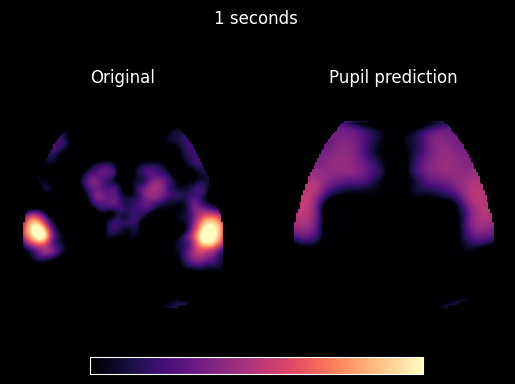

In [10]:
start = 2800
c1 = .01

plt.style.use("dark_background")

fig, (ax1, ax2) = plt.subplots(1,2)
im1 = ax1.imshow(outmat1[0,:,:], animated=True, vmin=-c1, vmax=c1, cmap = 'magma')
im2 = ax2.imshow(outmat2[0,:,:], animated=True, vmin=-c1, vmax=c1, cmap = 'magma')

ax1.axis('off')
ax2.axis('off')

cbar_ax = fig.add_axes([.25,.1,.52,.5])
cbar_ax.axis('off')
cbar = fig.colorbar(im1,ax=cbar_ax,orientation = "horizontal")
cbar.set_ticks([])

i = start
def update(*args):
    global i
    if (i<outmat1.shape[0]):
        i += 1
    else:
        i=0
    im1.set_array(outmat1[i,:,:])
    im2.set_array(outmat2[i,:,:])
    ax1.title.set_text('Original')
    ax2.title.set_text('Pupil prediction')
    fig.suptitle(str(np.ceil((i-start)*.05).astype(int)) + ' seconds', x=.51, y=0.9)

    return im1, im2

ani = FuncAnimation(fig, update, blit=True, interval=5, frames=3000)

plt.show()


In [11]:
f = figdir + '/mouse' + str(subj) + '_pupil_pred.mp4'
writervideo = FFMpegWriter(fps=60,bitrate=5000)
ani.save(f, writer=writervideo)

In [12]:
plt.style.use("default")